In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scanpy as sc
import pandas as pd
import seaborn as sb
import numpy as np
import torch
from rich import print
from scib_metrics.benchmark import Benchmarker

# Reproducibility
import scvi
from scvi.external import SysVI

# Define the path to the directory you want to change to
new_directory = '/scratch365/eaboelno/cVAE_analysis/sysVI/'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 0


Last run with scvi-tools version: 1.1.1

In [2]:
adata = sc.read_h5ad('./sysVI_h2m_all_output.h5ad')
adata

AnnData object with n_obs × n_vars = 433583 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order', 'umap'
    obsm: 'X_sysVI', 'X_uma

In [ ]:
#model = SysVI.load("./NEW_sysVI_all_merged_model/", adata)
#model

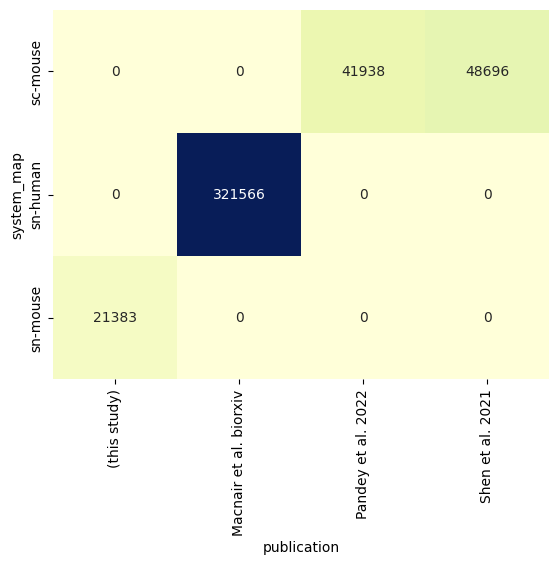

In [7]:
crosstab_df = pd.crosstab(adata.obs.system_map, adata.obs.publication)

# Create the heatmap with integer annotations
sb.heatmap(crosstab_df, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Show the heatmap
plt.show()

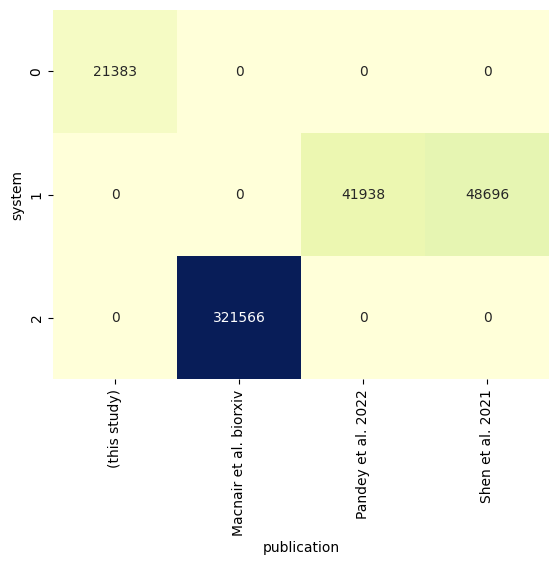

In [3]:
crosstab_df = pd.crosstab(adata.obs.system, adata.obs.publication)

# Create the heatmap with integer annotations
sb.heatmap(crosstab_df, cmap="YlGnBu", annot=True, fmt="d", cbar=False)

# Show the heatmap
plt.show()

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

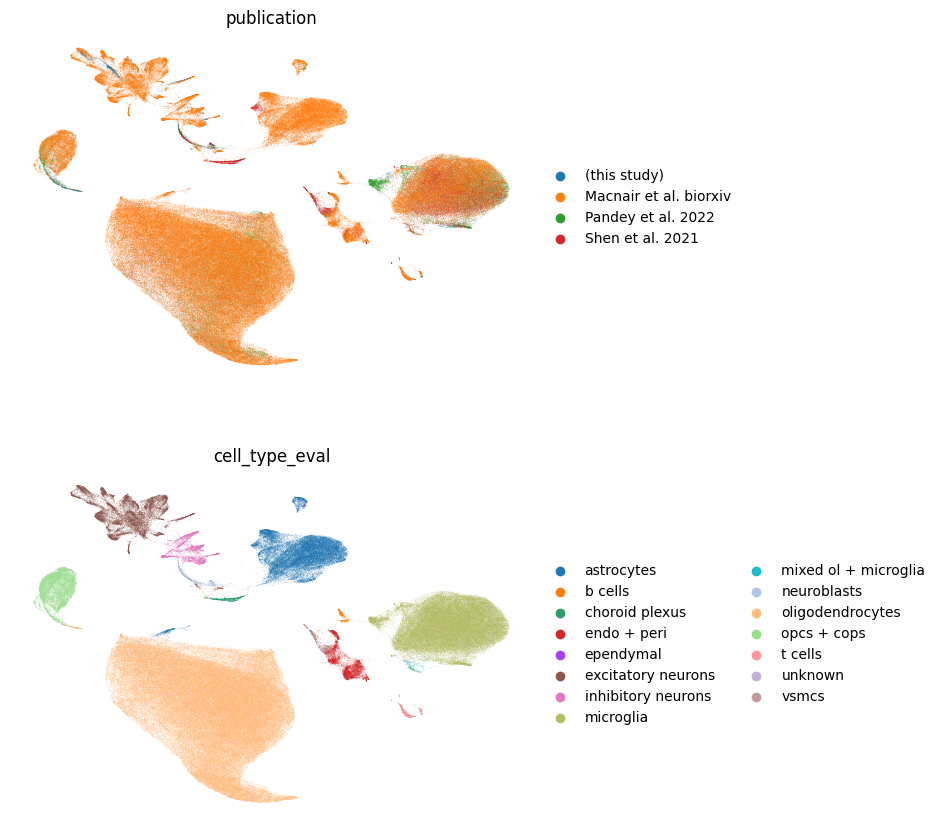

In [4]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=["publication", "cell_type_eval"],
    frameon=False,
    ncols=1,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

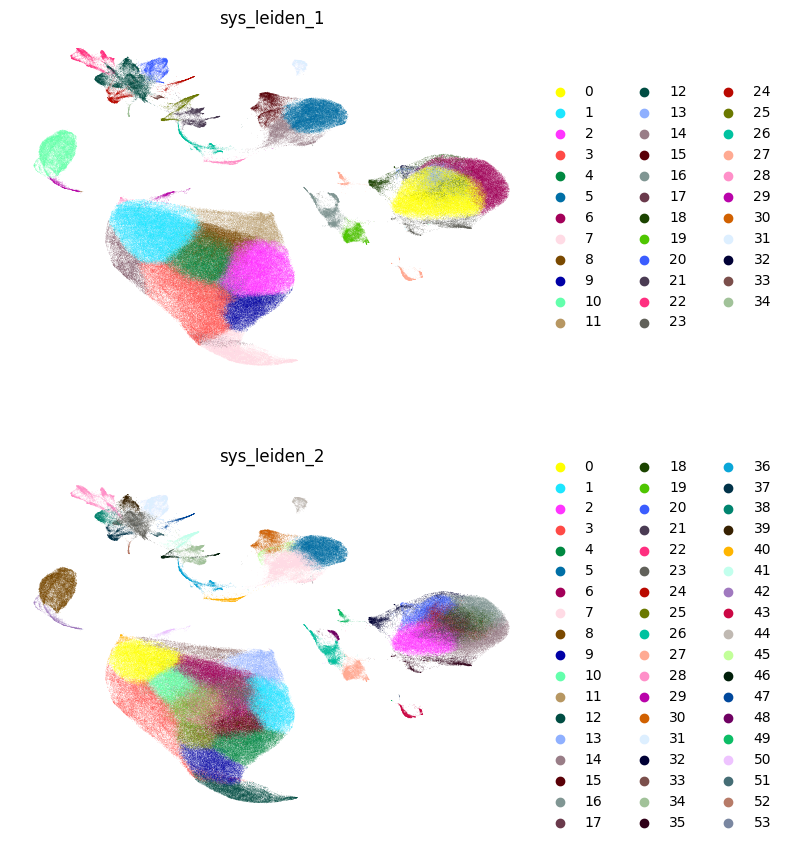

In [5]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=["sys_leiden_1", "sys_leiden_2"],
    frameon=False,
    ncols=1,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


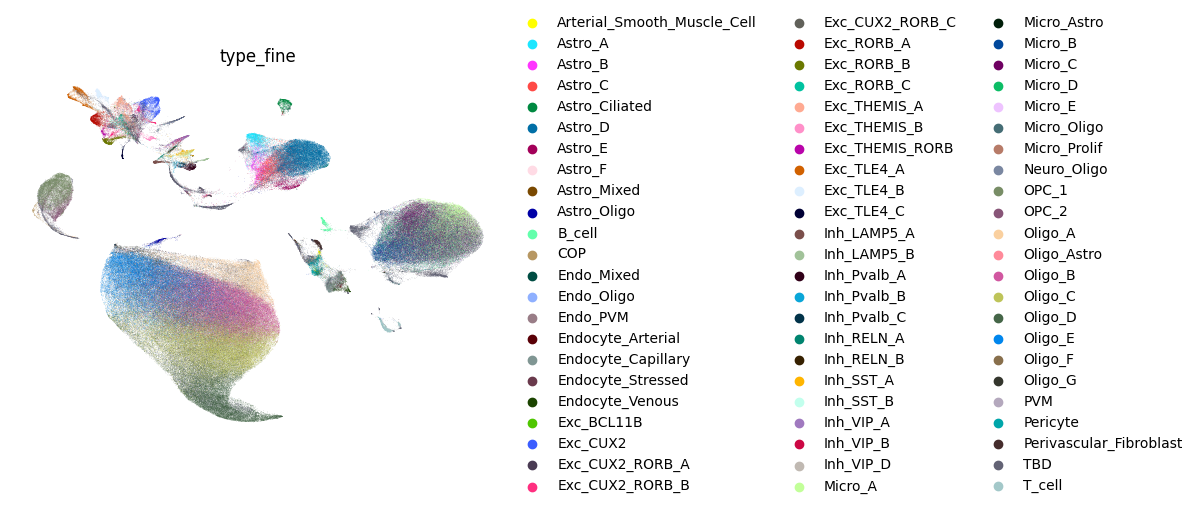

In [6]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=["type_fine"],
    frameon=False,
    ncols=1,
)

In [22]:
sc.pp.neighbors(adata, use_rep = 'X_sysVI', n_neighbors=20) #can go up if the dataset is very large; n_neighbors=15 default
#sc.tl.umap(adata) #increase min_dist reduces general features, default 0.1

In [24]:
sc.tl.umap(adata, min_dist=0.15)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

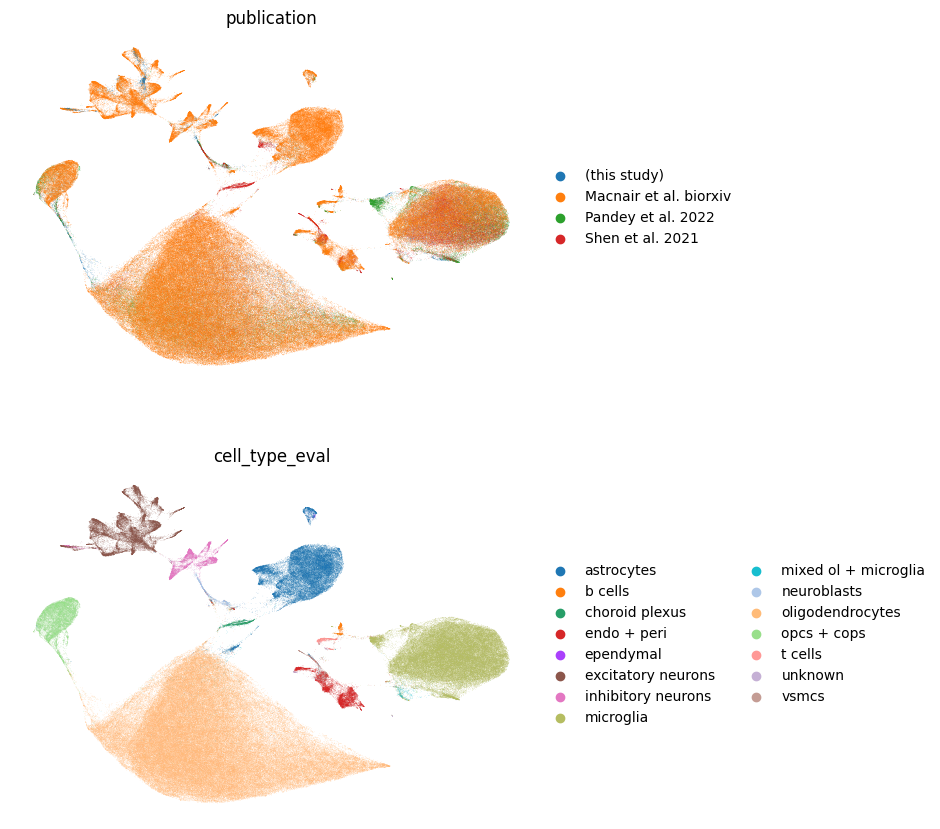

In [25]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=["publication", "cell_type_eval"],
    frameon=False,
    ncols=1,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


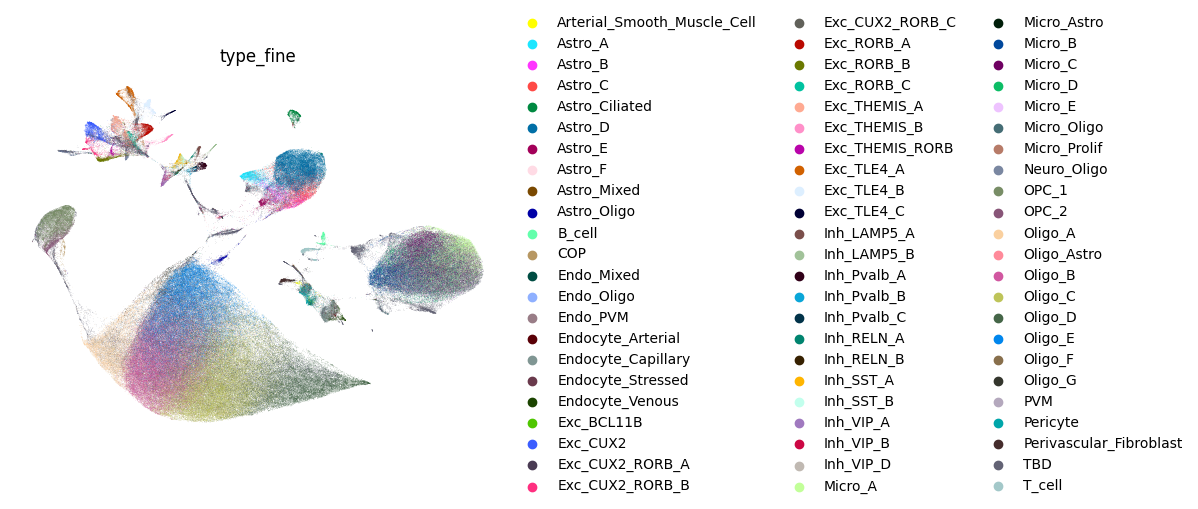

In [26]:
sc.pl.embedding(
    adata,
    basis='X_umap',
    color=["type_fine"],
    frameon=False,
    ncols=1,
)

# Subset oligo lineage

In [8]:
# Unique values in the 'condition' column
unique_conditions = adata.obs['cell_type_eval'].unique()
for condition in unique_conditions:
    print(condition)

excitatory neurons

inhibitory neurons

oligodendrocytes

astrocytes

microglia

opcs + cops

mixed ol + microglia

neuroblasts

ependymal

endo + peri

unknown

choroid plexus

vsmcs

t cells

b cells

In [9]:
desired_cell_types = ['opcs + cops', 'oligodendrocytes']
adata_ol = adata[adata.obs['cell_type_eval'].isin(desired_cell_types)].copy()
sc.pp.filter_genes(adata_ol, min_cells=1)
adata_ol

AnnData object with n_obs × n_vars = 246095 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order', 'umap', 'publication_co

         Falling back to preprocessing with `sc.pp.pca` and default params.


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be r

categories: 0, 1, 2, etc.
var_group_labels: OL lineage, OPC markers, COP markers, etc.


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


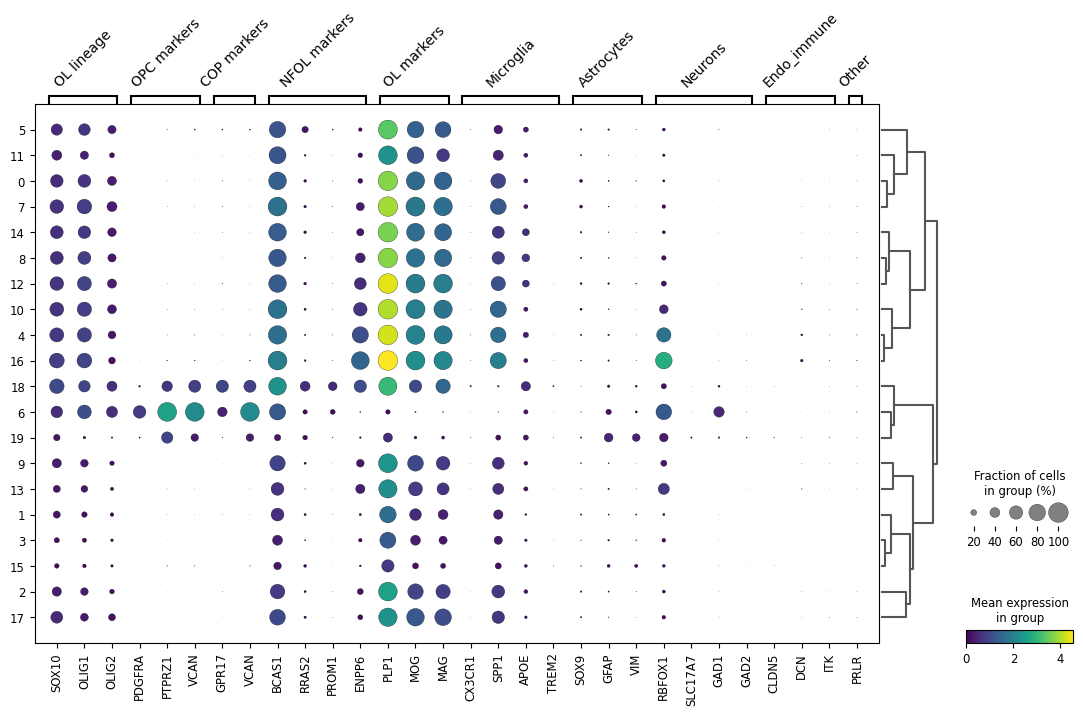

In [15]:
marker_genes = {
    'OL lineage': ['SOX10', 'OLIG1', 'OLIG2'],
    'OPC markers': ['PDGFRA', 'PTPRZ1', 'VCAN'],
    'COP markers': ['GPR17', 'VCAN'],
    'NFOL markers': ['BCAS1', 'RRAS2', 'PROM1', 'ENPP6'],
    'OL markers': ['PLP1', 'MOG', 'MAG'],
    'Microglia': ['CX3CR1','SPP1', 'APOE', 'TREM2'],
    'Astrocytes': ['SOX9', 'GFAP', 'VIM'],
    'Neurons': ['RBFOX1', 'SLC17A7', 'GAD1', 'GAD2'],
    'Endo_immune': ['CLDN5', 'DCN', 'ITK'],
    'Other': ['PRLR']
}

# Define the order of cell types
#cell_type_order = [
#    'opcs + cops', 'oligodendrocytes', 'mixed ol + microglia', 'microglia',
#    'astrocytes', 'neuroblasts', 'excitatory neurons', 'inhibitory neurons',
#    'endo + peri', 'ependymal', 'vsmcs', 't cells', 'b cells', 'choroid plexus', 'unknown'
#]

# Reorder the cell types
#adata_ol.obs['cell_type_eval'] = pd.Categorical(adata_ol.obs['cell_type_eval'], categories=cell_type_order, ordered=True)

# Flatten the list of genes in marker_genes while maintaining order
all_genes = [gene for genes in marker_genes.values() for gene in genes]

# Correct var_group_positions based on marker_genes
var_group_positions = []
start = 0
for genes in marker_genes.values():
    end = start + len(genes) - 1  # Calculate the end index for the group
    var_group_positions.append((start, end))  # Add the start and end index to var_group_positions
    start = end + 1  # Update the start index for the next group

# Plot the dotplot with the corrected parameters
sc.pl.dotplot(
    adata_ol,
    groupby="sys_OL_1",
    var_names=all_genes,
    use_raw=True,
    log=True,
    dendrogram=True,
    var_group_positions=var_group_positions,
    var_group_labels=list(marker_genes.keys()),
    var_group_rotation=45,
    standard_scale=None,  # Set to None to disable standard scaling
    swap_axes=False,  # Keep genes on the x-axis and cell types on the y-axis
    cmap='viridis',  # Choose a color map
    show=True
)

categories: COP, OPC_1, OPC_2, etc.
var_group_labels: OL lineage, OPC markers, COP markers, etc.


/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated

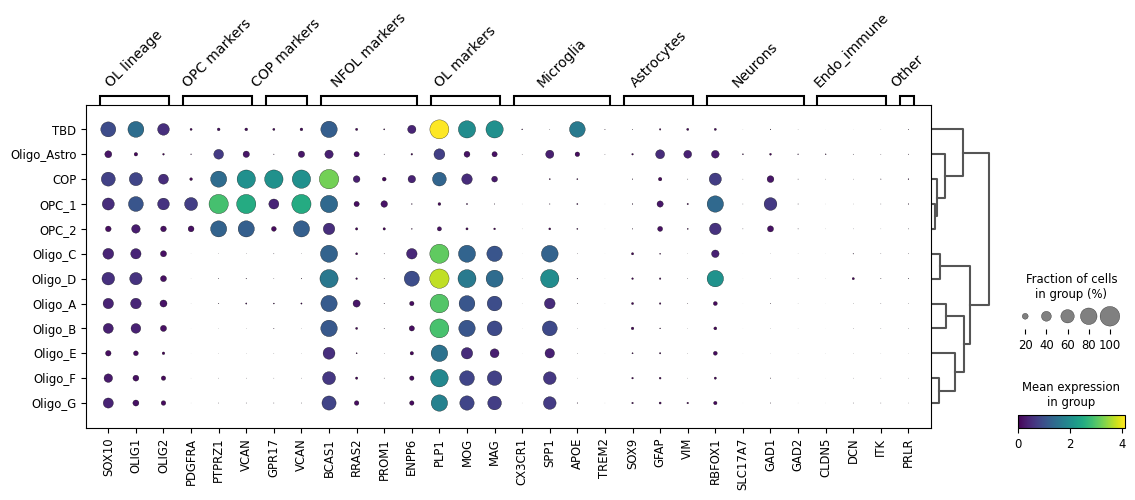

In [20]:
marker_genes = {
    'OL lineage': ['SOX10', 'OLIG1', 'OLIG2'],
    'OPC markers': ['PDGFRA', 'PTPRZ1', 'VCAN'],
    'COP markers': ['GPR17', 'VCAN'],
    'NFOL markers': ['BCAS1', 'RRAS2', 'PROM1', 'ENPP6'],
    'OL markers': ['PLP1', 'MOG', 'MAG'],
    'Microglia': ['CX3CR1','SPP1', 'APOE', 'TREM2'],
    'Astrocytes': ['SOX9', 'GFAP', 'VIM'],
    'Neurons': ['RBFOX1', 'SLC17A7', 'GAD1', 'GAD2'],
    'Endo_immune': ['CLDN5', 'DCN', 'ITK'],
    'Other': ['PRLR']
}

# Define the order of cell types
#cell_type_order = [
#    'opcs + cops', 'oligodendrocytes', 'mixed ol + microglia', 'microglia',
#    'astrocytes', 'neuroblasts', 'excitatory neurons', 'inhibitory neurons',
#    'endo + peri', 'ependymal', 'vsmcs', 't cells', 'b cells', 'choroid plexus', 'unknown'
#]

# Reorder the cell types
#adata_ol.obs['cell_type_eval'] = pd.Categorical(adata_ol.obs['cell_type_eval'], categories=cell_type_order, ordered=True)

# Flatten the list of genes in marker_genes while maintaining order
all_genes = [gene for genes in marker_genes.values() for gene in genes]

# Correct var_group_positions based on marker_genes
var_group_positions = []
start = 0
for genes in marker_genes.values():
    end = start + len(genes) - 1  # Calculate the end index for the group
    var_group_positions.append((start, end))  # Add the start and end index to var_group_positions
    start = end + 1  # Update the start index for the next group

# Plot the dotplot with the corrected parameters
sc.pl.dotplot(
    adata_ol,
    groupby="type_fine",
    var_names=all_genes,
    use_raw=True,
    log=True,
    dendrogram=True,
    var_group_positions=var_group_positions,
    var_group_labels=list(marker_genes.keys()),
    var_group_rotation=45,
    standard_scale=None,  # Set to None to disable standard scaling
    swap_axes=False,  # Keep genes on the x-axis and cell types on the y-axis
    cmap='viridis',  # Choose a color map
    show=True
)

In [10]:
# Compute new UMAP
sc.pp.neighbors(adata_ol, use_rep="X_sysVI")
sc.tl.umap(adata_ol)

In [11]:
sc.tl.leiden(adata_ol, resolution=1, key_added="sys_OL_1")
sc.tl.leiden(adata_ol, resolution=2, key_added="sys_OL_2")
adata_ol

AnnData object with n_obs × n_vars = 246095 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2', 'sys_OL_1', 'sys_OL_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order',

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

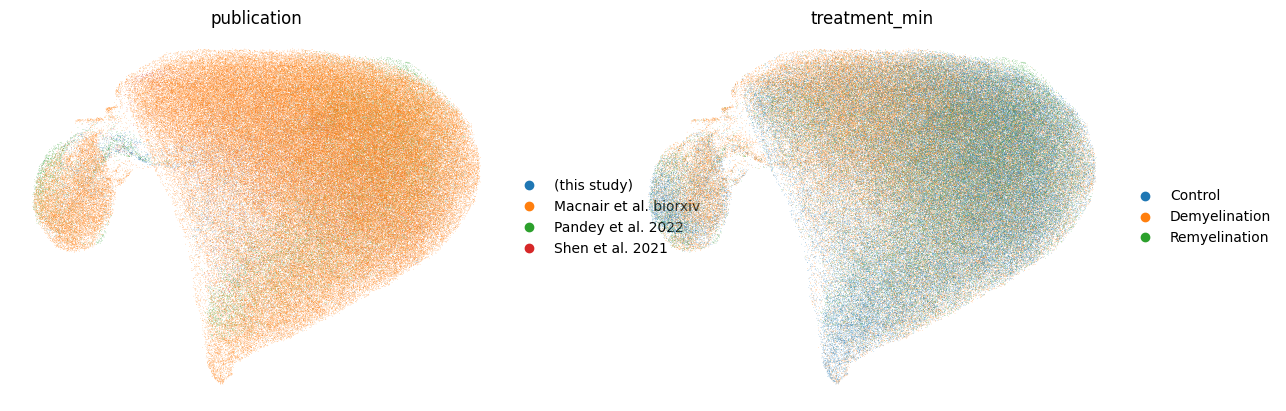

In [12]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["publication", "treatment_min"],
    frameon=False,
    ncols=2,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

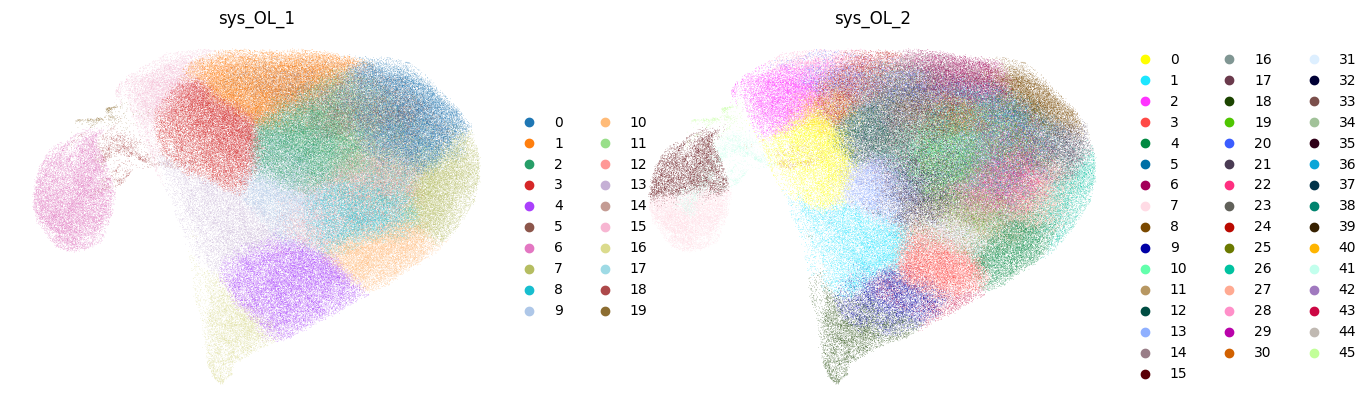

In [16]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["sys_OL_1", "sys_OL_2"],
    frameon=False,
    ncols=2,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

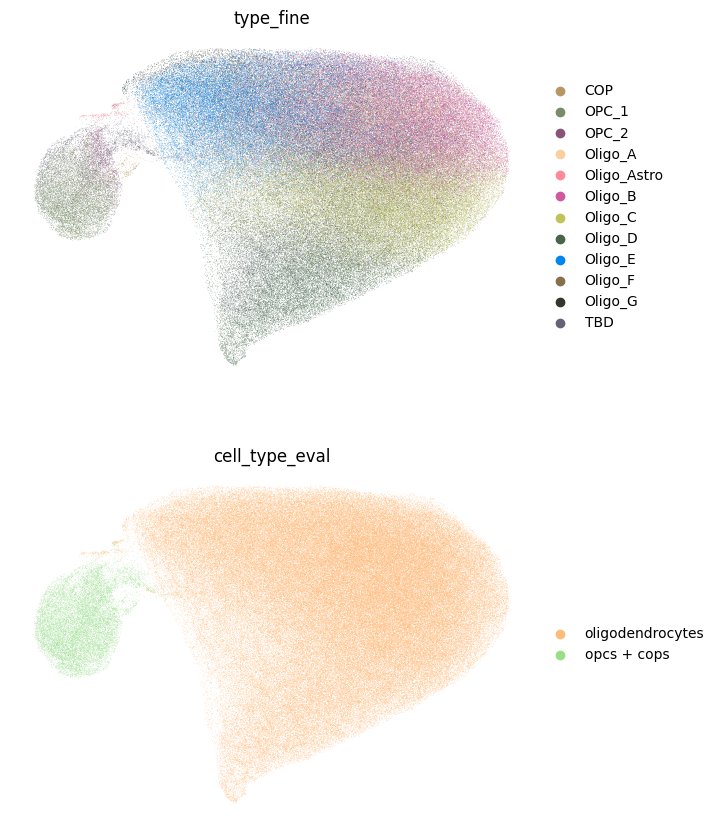

In [17]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["type_fine", "cell_type_eval"],
    frameon=False,
    ncols=1,
)

In [18]:
# Compute new UMAP
sc.pp.neighbors(adata_ol, use_rep="X_sysVI", n_neighbors = 30)
sc.tl.umap(adata_ol, min_dist = 0.2)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

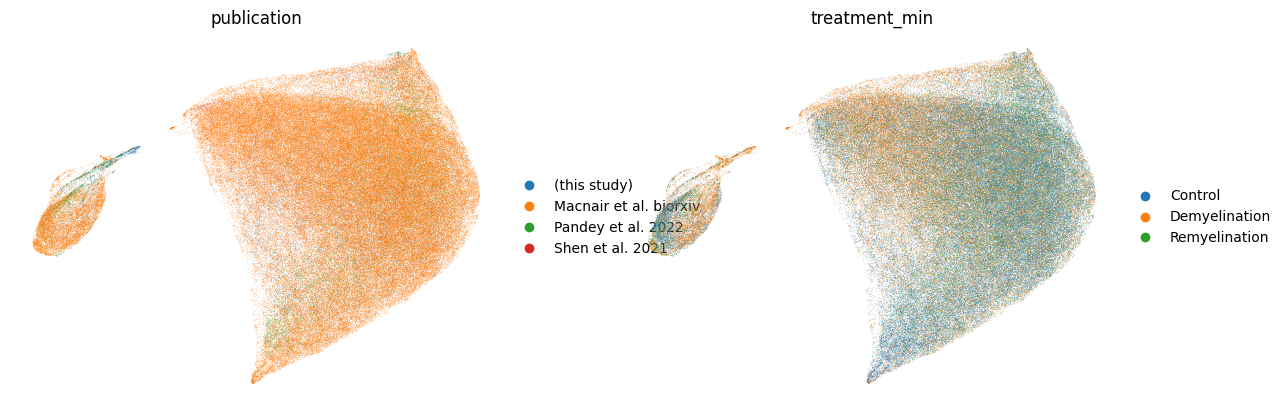

In [19]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["publication", "treatment_min"],
    frameon=False,
    ncols=2,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


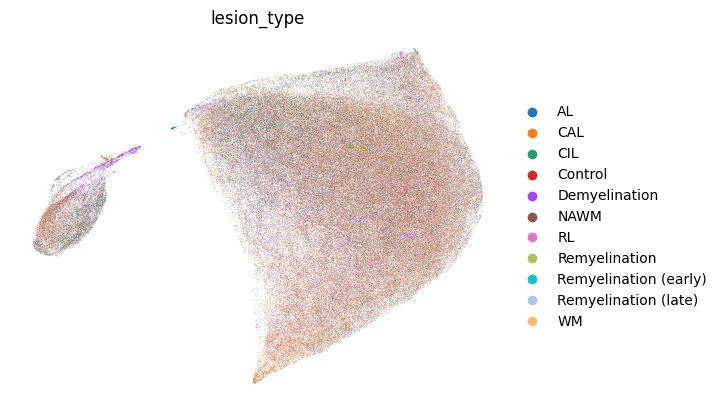

In [37]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["lesion_type"],
    frameon=False,
    ncols=1,
)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


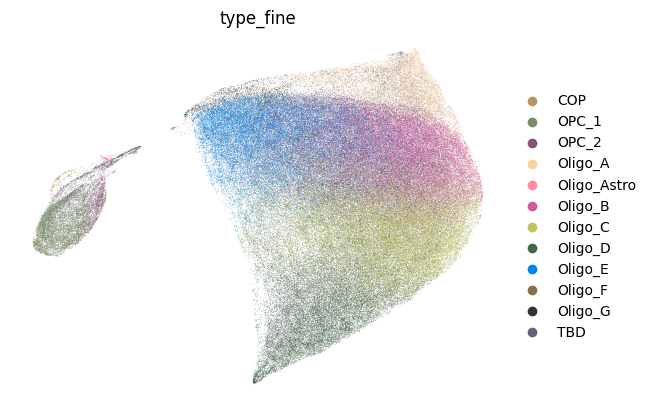

In [21]:
sc.pl.embedding(
    adata_ol,
    basis='X_umap',
    color=["type_fine"],
    frameon=False,
    ncols=1,
)

In [27]:
adata

AnnData object with n_obs × n_vars = 433583 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order', 'umap', 'publication_colors', 'cel

In [28]:
adata_ol

AnnData object with n_obs × n_vars = 246095 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2', 'sys_OL_1', 'sys_OL_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order',

In [29]:
adata.write_h5ad('./sysVI_h2m_NEW_all.h5ad')

In [30]:
adata_ol.write_h5ad('./sysVI_h2m_NEW_OL.h5ad')

# Microglia

In [31]:
desired_cell_types = ['microglia']
adata_mg = adata[adata.obs['cell_type_eval'].isin(desired_cell_types)].copy()
sc.pp.filter_genes(adata_mg, min_cells=1)
adata_mg

AnnData object with n_obs × n_vars = 90770 × 2904
    obs: 'sample_id', 'publication', 'sample_id_anon', 'individual_id_anon', 'replicate', 'treatment', 'condition', 'tissue', 'time', 'batch', 'lesion_type', 'sample_source', 'diagnosis', 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 's_score', 'g2m_score', 'phase', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'seq_pool', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'cell_cycle_diff', 'cell_type_eval', 'library_type', 'sample_type', 'organism', 'system', 'n_counts', 'treatment_min', 'system_map', 'sys_leiden_1', 'sys_leiden_1.5', 'sys_leiden_2'
    var: 'human_gene_id', 'mouse_gene_id', 'mouse_gene_name', 'human_gene_name', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'covariate_categ_orders', 'covariate_key_orders', 'layer_information', 'leiden', 'neighbors', 'system_order', 'umap', 'publication_col

In [32]:
# Compute new UMAP
#sc.pp.neighbors(adata_ol, use_rep="X_sysVI", n_neighbors = 30)
#sc.tl.umap(adata_ol, min_dist = 0.2)

sc.pp.neighbors(adata_ol, use_rep="X_sysVI")
sc.tl.umap(adata_mg)

In [33]:
sc.tl.leiden(adata_mg, resolution=1, key_added="sys_MG_1")
sc.tl.leiden(adata_mg, resolution=2, key_added="sys_MG_2")

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/sysVI/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seei

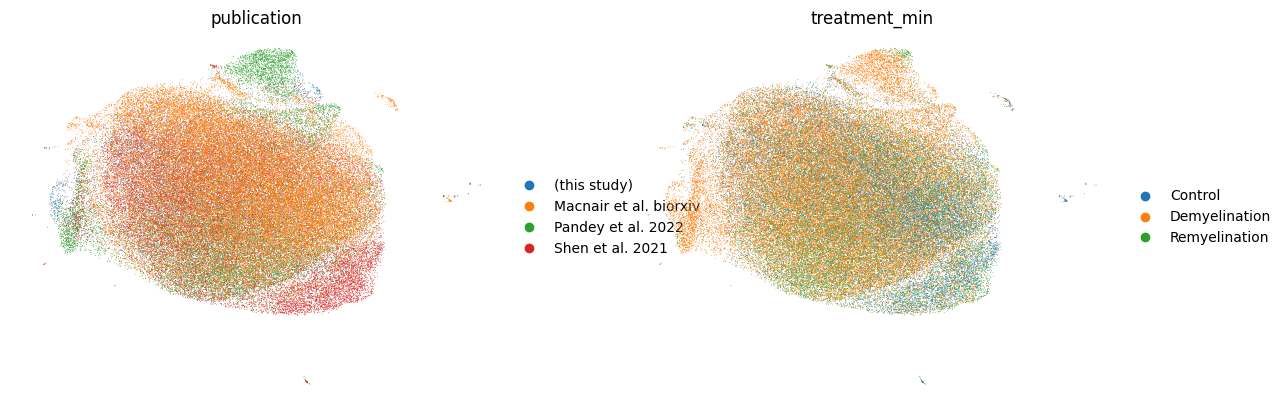

In [34]:
sc.pl.embedding(
    adata_mg,
    basis='X_umap',
    color=["publication", "treatment_min"],
    frameon=False,
    ncols=2,
)

In [51]:
adata_mg.write_h5ad('./sysVI_h2m_NEW_MG.h5ad')